## Setup

In [1]:
import torchvision.transforms as tfs
from src.models.utils import download_checkpoint, load_model
from src.experiments import *
from src.experiments.utils import *
from src.visualization import *
from src.optimization import *
from IPython.display import Image 
from PIL import Image

checkpoint_path = download_checkpoint("https://drive.google.com/file/d/19m_SaRNEF7JXHjeyNu26AxgaEQXqpI00", "protopnet.pt")
model = load_model('protopnet', checkpoint_path, device="cuda")
size = 224

fatal: destination path 'ProtoPNet' already exists and is not an empty directory.


In [2]:
input_tensor = torch.rand((3, size, size))

transforms = [ClampingMinMax(0, 1)]
parametrization_transforms = [NormalizationMeanStd()]
denormalization_transforms = [DenormalizationMeanStd()]

## Only new robustness transformations

step: 0/500, loss: 10.103143692016602
step: 100/500, loss: 0.31439679861068726
step: 200/500, loss: 0.4298734664916992
step: 300/500, loss: 0.28437215089797974
step: 400/500, loss: 0.12701323628425598


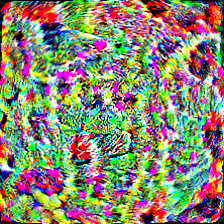

In [3]:
ptypes = [(188,1)]

robustness_transforms = [
    tfs.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0),
    tfs.RandomRotation((-1, 1)),
    tfs.RandomResizedCrop(size=224, scale=(0.99, 1))
]

image = visualize_prototypes(model, 
                             ptypes,
                            optimization_steps=500, 
                            input_tensor=input_tensor.clone(),
                            transforms=transforms, 
                            robustness_transforms=robustness_transforms,
                            parametrization_transforms=parametrization_transforms,
                            denormalization_transforms=denormalization_transforms,
                            optimizer_kwargs={'lr': 0.2}, 
                            print_interval=100,
                            display_interval=None)

pilimg = tfs.ToPILImage()(image)
display(pilimg)

## Gaussian blurring + new robustness transformations

step: 0/500, loss: 10.503780364990234
step: 100/500, loss: 0.323465496301651
step: 200/500, loss: 0.07398956269025803
step: 300/500, loss: 0.08968368917703629
step: 400/500, loss: 0.1215144619345665


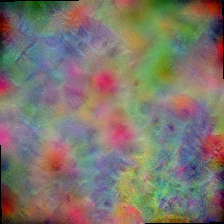

In [7]:
robustness_transforms = [
    tfs.GaussianBlur(7, 2),
    tfs.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0),
    tfs.RandomRotation((-1, 1)),
    tfs.RandomResizedCrop(size=224, scale=(0.99, 1))
]

image = visualize_prototypes(model, 
                             ptypes,
                            optimization_steps=500, 
                            input_tensor=input_tensor.clone(),
                            transforms=transforms, 
                            robustness_transforms=robustness_transforms,
                            parametrization_transforms=parametrization_transforms,
                            denormalization_transforms=denormalization_transforms,
                            optimizer_kwargs={'lr': 0.2}, 
                            print_interval=100,
                            display_interval=None)

pilimg = tfs.ToPILImage()(image)
display(pilimg)

## Octaves with gaussian blurring

step: 0/500, loss: 8.502090454101562
step: 100/500, loss: 3.291900634765625
step: 200/500, loss: 3.0225372314453125
step: 300/500, loss: 3.020660400390625
step: 400/500, loss: 2.979705810546875
step: 0/500, loss: 2.8772125244140625
step: 100/500, loss: 2.592010498046875
step: 200/500, loss: 2.5451507568359375
step: 300/500, loss: 2.55267333984375
step: 400/500, loss: 2.5562591552734375
step: 0/500, loss: 2.3869171142578125
step: 100/500, loss: 1.73699951171875
step: 200/500, loss: 1.75750732421875
step: 300/500, loss: 1.7862091064453125
step: 400/500, loss: 1.791900634765625
step: 0/500, loss: 2.1009063720703125
step: 100/500, loss: 1.2781829833984375
step: 200/500, loss: 1.271453857421875
step: 300/500, loss: 1.204559326171875
step: 400/500, loss: 1.2298583984375
step: 0/500, loss: 1.2376747131347656
step: 100/500, loss: 0.10610198974609375
step: 200/500, loss: 0.0746002197265625
step: 300/500, loss: 0.06671524047851562
step: 400/500, loss: 0.06998443603515625
step: 0/500, loss: 1.403

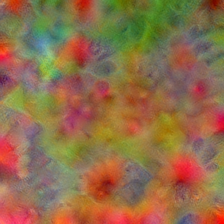

In [5]:
robustness_transforms = [
    tfs.GaussianBlur(7, 2)
]

image = visualize_prototypes_octaves(model, 
                             ptypes,
                            optimization_steps=500, 
                            input_tensor=input_tensor.clone(),
                            transforms=transforms, 
                            robustness_transforms=robustness_transforms,
                            parametrization_transforms=parametrization_transforms,
                            denormalization_transforms=denormalization_transforms,
                            optimizer_kwargs={'lr': 0.2}, 
                            print_interval=100,
                            display_interval=None)

pilimg = tfs.ToPILImage()(image)
display(pilimg)

## Octaves with new robusness transformations

step: 0/500, loss: 8.422576904296875
step: 100/500, loss: 2.35186767578125
step: 200/500, loss: 2.2270050048828125
step: 300/500, loss: 2.1834259033203125
step: 400/500, loss: 2.17767333984375
step: 0/500, loss: 3.45721435546875
step: 100/500, loss: 1.7535247802734375
step: 200/500, loss: 1.7444000244140625
step: 300/500, loss: 1.726959228515625
step: 400/500, loss: 1.7343902587890625
step: 0/500, loss: 3.0921630859375
step: 100/500, loss: 1.145782470703125
step: 200/500, loss: 1.1121063232421875
step: 300/500, loss: 1.0933380126953125
step: 400/500, loss: 1.1111297607421875
step: 0/500, loss: 2.90625
step: 100/500, loss: 0.7548828125
step: 200/500, loss: 0.7197418212890625
step: 300/500, loss: 0.6908721923828125
step: 400/500, loss: 0.7439727783203125
step: 0/500, loss: 4.035663604736328
step: 100/500, loss: 0.011707305908203125
step: 200/500, loss: 0.05757904052734375
step: 300/500, loss: 0.00579833984375
step: 400/500, loss: 0.07721710205078125
step: 0/500, loss: 1.625457763671875
s

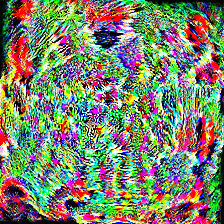

In [8]:
robustness_transforms = [
    tfs.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0),
    tfs.RandomRotation((-1, 1))
]

image = visualize_prototypes_octaves(model, 
                             ptypes,
                            optimization_steps=500, 
                            input_tensor=input_tensor.clone(),
                            transforms=transforms, 
                            robustness_transforms=robustness_transforms,
                            parametrization_transforms=parametrization_transforms,
                            denormalization_transforms=denormalization_transforms,
                            optimizer_kwargs={'lr': 0.2}, 
                            print_interval=100,
                            display_interval=None)

pilimg = tfs.ToPILImage()(image)
display(pilimg)

## Octaves with gaussian blurring + new robusness transformations

In [ ]:
robustness_transforms = [
    tfs.GaussianBlur(7, 2),
    tfs.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0),
    tfs.RandomRotation((-1, 1))
]

image = visualize_prototypes_octaves(model, 
                             ptypes,
                            optimization_steps=500, 
                            input_tensor=input_tensor.clone(),
                            transforms=transforms, 
                            robustness_transforms=robustness_transforms,
                            parametrization_transforms=parametrization_transforms,
                            denormalization_transforms=denormalization_transforms,
                            optimizer_kwargs={'lr': 0.2}, 
                            print_interval=100,
                            display_interval=None)

pilimg = tfs.ToPILImage()(image)
display(pilimg)

step: 0/500, loss: 8.502090454101562
step: 100/500, loss: 3.29193115234375
step: 200/500, loss: 3.0225372314453125
step: 300/500, loss: 3.020660400390625
step: 400/500, loss: 2.979705810546875
step: 0/500, loss: 2.8772125244140625
step: 100/500, loss: 2.5919952392578125
step: 200/500, loss: 2.5390625
step: 300/500, loss: 2.5487518310546875
step: 400/500, loss: 2.5807952880859375
step: 0/500, loss: 2.3116302490234375
step: 100/500, loss: 1.76666259765625
step: 200/500, loss: 1.76007080078125
step: 300/500, loss: 1.7150115966796875
step: 400/500, loss: 1.753143310546875
step: 0/500, loss: 2.12567138671875
step: 100/500, loss: 1.1491851806640625
step: 200/500, loss: 1.062042236328125
step: 300/500, loss: 1.0810699462890625
step: 400/500, loss: 1.1011505126953125
step: 0/500, loss: 0.9743194580078125
step: 100/500, loss: 0.079620361328125
step: 200/500, loss: 0.5229377746582031
step: 300/500, loss: 0.08047103881835938
step: 400/500, loss: 0.051074981689453125
step: 0/500, loss: 1.457195281